# Studies about gravitational waves, glitches on O3 run data - We need be able to obtain data from LIGO, HANFORD and VIRGO interferometers, manipulate this data and plot the results from O3 run.

## 1 Introduction

Given this theoretical foundation, we moved on to practical analysis using the Python programming language to carry out a statistical study of the main types of glitches. We evaluated their occurrence frequencies during the O3a and O3b runs, their peak frequency distributions, signal-to-noise ratios (SNR), and other relevant parameters.

First we need import the necessary libraries

In [1]:
!pip install gwpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.time import Time

import statistic_functions as sf

We can collect data in three main ways:

1 - from Gravitational Waves Open Science Center (GWOSC, https://gwosc.org/data/);

2 - from LigoDV-web (H1, L1, V1 - https://login.ligo.org/idp/profile/SAML2/Redirect/SSO?execution=e1s2) that **need of your LIGO credentials**;

3 - from Zenodo website (H1, L1 - https://zenodo.org/records/5649212) that **does't have V1 data**.

## 2 Clean the data and filter interesting features

You can make this all process with any interferometers. In our case is V1 from GWOSC.

### 2.1 To see the data in dataFrame mode, use pandas libraries

* **The O3 run have some duplicates data, depending on the source you got the data. This happens because some sources get data from multiple interferometers, or because the data have overlapping data segments in time windows. Furthermore, during data cleaning or combining different glitch catalogs (e.g., Gravity Spy + Omicron), indentical glitches might be added more than once. So, we use df.drop_duplicates()**

In [3]:
dfligo_V1_O3a = pd.read_csv("V1_O3a_gspyLIGO.csv").drop_duplicates()
dfligo_V1_O3b = pd.read_csv("V1_O3b_gspyLIGO.csv").drop_duplicates()

dfligo_V1_O3a.tail()

,GPStime,peakFreq,snr,amplitude,centralFreq,duration,bandwidth,chisq,chisqDof,confidence,id,ifo,label,imgUrl,Q-value
80393,1.253167e+09,21.276,7.905,1.460000e-21,3680.246,2.013,7328.491699,0.0,0.0,0.187,axFS82a5rf,V1,Light_Modulation,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627
80394,1.253478e+09,19.950,7.959,1.800000e-21,42.988,0.500,53.975620,0.0,0.0,0.184,aH3vyF6Rc1,V1,None_of_the_Above,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627
80395,1.244633e+09,418.816,8.968,2.010000e-22,302.104,0.359,547.768860,0.0,0.0,0.177,fgQ0bycRBj,V1,None_of_the_Above,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627
80396,1.240533e+09,116.576,10.334,1.270000e-22,109.385,0.375,182.753067,0.0,0.0,0.172,vmTmg3Y2x0,V1,Scratchy,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,11.314
80397,1.241687e+09,349.985,8.376,1.570000e-22,324.817,0.703,600.853760,0.0,0.0,0.161,0o9ovV7MEB,V1,Koi_Fish,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627


### 2.2 To only filter glitches that have confidence vales above 90%

* **The reason why pipelines like Gravity Spy have relatively few glitches classified with confidence above 90% is due to a combination of factors. Glitches are highly diverse and often ambiguous, making them hard to classify with certainty. The machine learning models used are cautious and assign high confidence only when the classification is very clear. Additionally, the training data may be imbalanced, with some glitch types being rare or underrepresented. Visual similarities between categories can also reduce confidence. As a result, most confidence scores tend to fall below the 90% threshold, which is expected in complex multi-class classification problems.**

A lot glitches have no high confidence from its pipeline classification, so lets only filter this nice glitches confidence for our analysis. The length of our data was decreased.

In [4]:
clean_V1_O3a = dfligo_V1_O3a[dfligo_V1_O3a['confidence'] >= 0.9]
clean_V1_O3b = dfligo_V1_O3b[dfligo_V1_O3b['confidence'] >= 0.9]

clean_V1_O3a.shape

(46195, 15)

## 3 Analyze the frequency of each categorized glitch of O3 in general, but also splitting the analysis for O3a (April 1st 2019 - October 1st 2019) and O3b (November 1st 2019 - March 27th 2020) runs

### 3.1 The dominance of each glitch in O3a run

* **During the O3a and O3b observing runs, there was a clear dominance of certain glitch types, both in quantity and persistence over time. Blip glitches were especially prevalent during O3a, appearing frequently and relatively uniformly across different months. Other commonly observed types included scattered light, often associated with nighttime or seismic activity, and power line glitches, which are linked to persistent electrical noise. In contrast, categories such as low-frequency burst or 1400 ripple were much rarer and more localized, making statistical analysis and classifier training more difficult. This imbalance in glitch occurrence reflects both instrumental and environmental conditions that influence detector sensitivity and the nature of noise sources during different phases of the observation run.**

To count each glitch that we have, we use the **.value_counts()** function in the column **"label"** of our data.

 The function **.nlargest(m)** select the **"m"** biggest

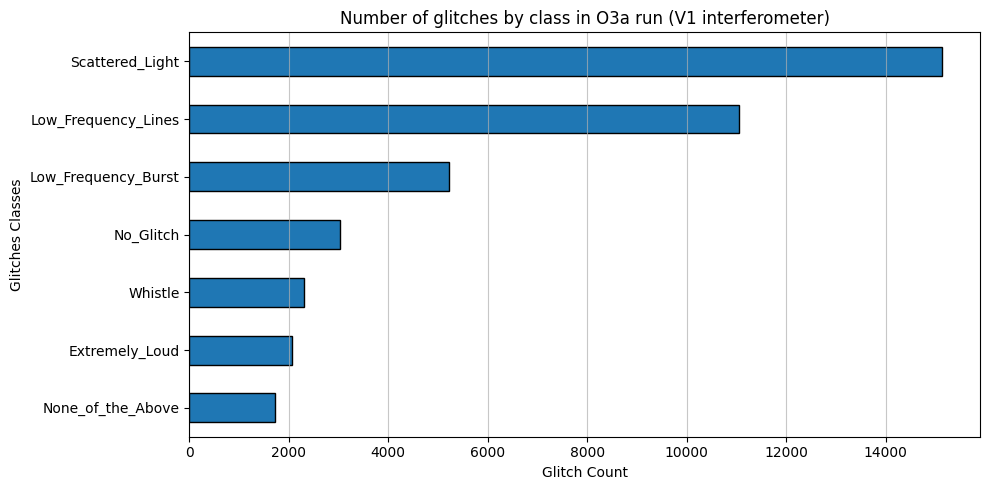

In [5]:
plt.figure(figsize=(10, 5))

glitch_countsO3a = clean_V1_O3a['label'].value_counts().nlargest(7).sort_values(ascending=True)

glitch_countsO3a.plot(kind='barh', edgecolor='black')

plt.title('Number of glitches by class in O3a run (V1 interferometer)')
plt.xlabel('Glitch Count')
plt.ylabel('Glitches Classes')

plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.2 And for O3b run we have

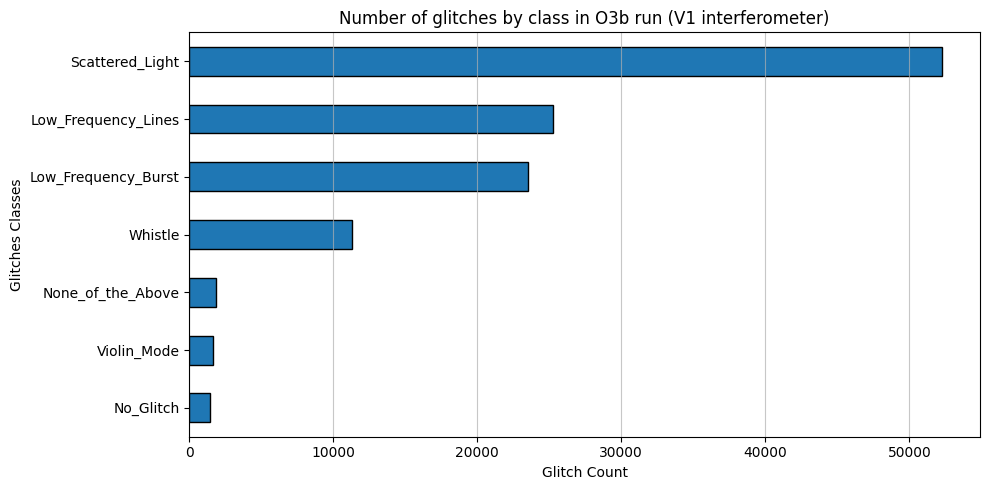

In [6]:
plt.figure(figsize=(10, 5))

glitch_countsO3b = clean_V1_O3b['label'].value_counts().nlargest(7).sort_values(ascending=True)

glitch_countsO3b.plot(kind='barh', edgecolor='black')

plt.title('Number of glitches by class in O3b run (V1 interferometer)')
plt.xlabel('Glitch Count')
plt.ylabel('Glitches Classes')

plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that **scattering-light** (and **fast-scattering** inside it) are the glitches that occurred the most during the O3b run - around November 1st 2019 - March 27th 2020. This agreed with Tabata teses (https://www.gov.br/inpe/pt-br/area-conhecimento/posgraduacao/ast/repositorio-de-arquivos/teses/tese_tabata_aira_ferreira.pdf)

## 4 Time-tracking of the incidence of each glitch category throughout O3 (by monthly, season, …)

In [7]:
clean_V1_O3a = clean_V1_O3a.sort_values(by='GPStime', ascending=True)
clean_V1_O3b = clean_V1_O3b.sort_values(by='GPStime', ascending=True)

clean_V1_O3a = clean_V1_O3a.reset_index(drop=True)
clean_V1_O3b = clean_V1_O3b.reset_index(drop=True)

clean_V1_O3a.head()

,GPStime,peakFreq,snr,amplitude,centralFreq,duration,bandwidth,chisq,chisqDof,confidence,id,ifo,label,imgUrl,Q-value
0,1.238166e+09,118.526,12.088,1.090000e-22,211.877,0.094,331.946350,0.0,0.0,1.000,U9hF0CFicL,V1,Blip,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,5.657
1,1.238167e+09,19.950,7.867,2.590000e-21,20.195,0.750,8.390090,0.0,0.0,0.998,cFEXeEnnvv,V1,Low_Frequency_Lines,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,22.627
2,1.238167e+09,41.312,8.180,2.460000e-22,65.530,0.078,82.279373,0.0,0.0,1.000,7Rmzlmneu5,V1,Blip,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,5.657
3,1.238167e+09,19.056,8.306,3.290000e-21,19.370,1.750,2.439150,0.0,0.0,0.965,pwXEfq8DlK,V1,Low_Frequency_Lines,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,45.255
4,1.238168e+09,340.202,12.113,1.970000e-22,357.194,0.313,218.644699,0.0,0.0,1.000,wiP1dmnUtc,V1,Whistle,https://ldas-jobs.ligo.caltech.edu/~gravityspy...,45.255


## 4.1 Amount of glitches per time

We also examined the temporal distribution of glitches over the course of the campaign, using line plots segmented by subperiods O3a and O3b. The goal was to identify seasonal patterns or variations linked to environmental, operational, or instrumental factors. We will see that the values increase around March and November while decreasing in the intermediate months, indicating some pattern that may occur due to the seasons.

In [8]:
init_data_O3a = clean_V1_O3a.copy()
init_data_O3b = clean_V1_O3b.copy()

data that need to be modify according to your preferences

In [9]:
interval = 7*24*3600           # seconds in a week
glitches_number = 4
glitches_chosen = ['Scattered_Light', 'Low_Frequency_Lines', 'Low_Frequency_Burst', 'Koi_Fish']

* Here we use the external function **count_glitches()** to calculate the amount of glitches.

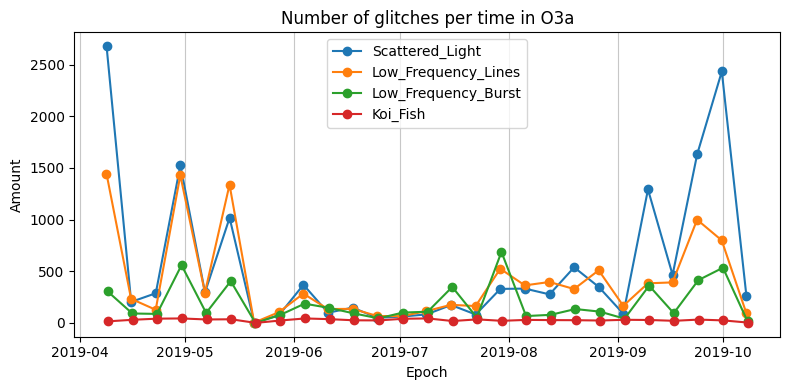

In [10]:
plt.figure(figsize=(8, 4))

for glit in glitches_chosen:
  counts, bins_dt = sf.count_glitches(init_data_O3a, glit, interval)

  plt.plot(bins_dt, counts, marker='o', linestyle='-', label=glit)

plt.title('Number of glitches per time in O3a')
plt.xlabel('Epoch')
plt.ylabel('Amount')

plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

And for O3b we have

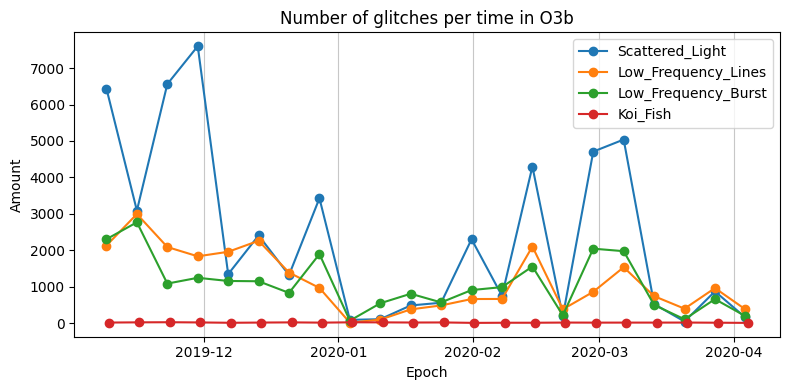

In [11]:
plt.figure(figsize=(8, 4))

for glit in glitches_chosen:
  counts, bins_dt = sf.count_glitches(init_data_O3b, glit, interval)

  plt.plot(bins_dt, counts, marker='o', linestyle='-', label=glit)

plt.title('Number of glitches per time in O3b')
plt.xlabel('Epoch')
plt.ylabel('Amount')

plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

## 4.2 Rate of glitches per time

Now we will calculate the glitches rate, i.e., the amount of glitches considering the operation time of interferometer. In our case we will consider the amount per week, but you can try other alternatives.

Plotting the weekly glitch rate is important because it shows the interferometer’s actual performance regardless of how long it was operational. Simply counting glitches can be misleading, as longer operational periods naturally tend to record more events. By dividing the number of glitches by the runtime, the rate reveals whether the detector is becoming more or less stable, allowing for fair comparisons between different periods, identifying potential technical issues, and relating variations to configuration changes or environmental conditions.

First we need import data. Here **df1** is from O3a, **df2** is from O3b and **df** is all O3 run. We obtain this data from:

 https://gwosc.org/timeline/show/O3a_16KHZ_R1/H1_DATA*L1_DATA*V1_DATA/1238166018/15811200/

In [12]:
df1 = pd.read_csv('gwosc.org.txt', sep=' ', header=None, names=['start', 'end', 'duration'])
df2 = pd.read_csv('gwosc2.org.txt', sep=' ', header=None, names=['start', 'end', 'duration'])

df = pd.concat([df1, df2], ignore_index=True)

* The following function give to us the **operation time** of Virgo interferometer via external function **rate_glitches()**.

Here we will consider the operation time of Virgo interferometer (given by **active** variable).

So we need divide the **amount** of glitch per **operation time**, in each week. In this case we will take all O3 run (by **df**).

In [13]:
O3_all = pd.concat([init_data_O3a, init_data_O3b], ignore_index=True)
active_O3all = sf.time_active(df, interval)

/content/statistic_functions.py:38: RuntimeWarning: invalid value encountered in divide
  rate = counts / active_week


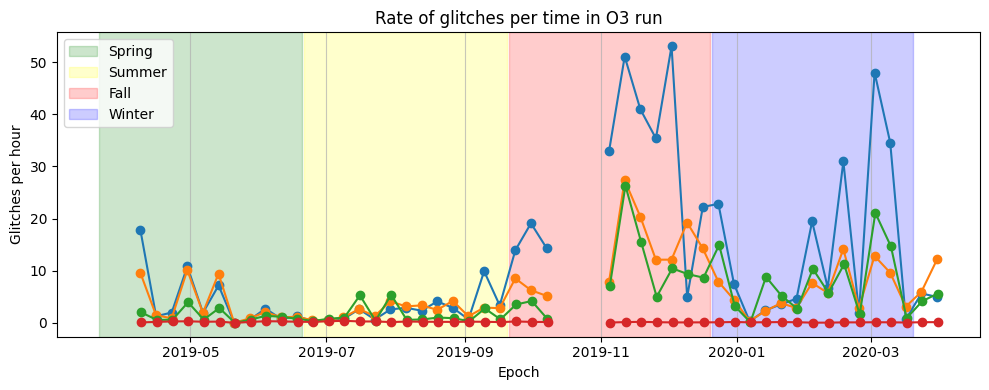

In [14]:
plt.figure(figsize=(10,4))
ax = plt.gca()

anos = [2019]
for ano in anos:
    sf.adicionar_faixa(ax, pd.Timestamp(f'{ano}-03-21'), pd.Timestamp(f'{ano}-06-20'), 'green', 'Spring' if ano == anos[0] else None)
    sf.adicionar_faixa(ax, pd.Timestamp(f'{ano}-06-21'), pd.Timestamp(f'{ano}-09-20'), 'yellow', 'Summer' if ano == anos[0] else None)
    sf.adicionar_faixa(ax, pd.Timestamp(f'{ano}-09-21'), pd.Timestamp(f'{ano}-12-20'), 'red', 'Fall' if ano == anos[0] else None)
    sf.adicionar_faixa(ax, pd.Timestamp(f'{ano}-12-21'), pd.Timestamp(f'{ano+1}-03-20'), 'blue', 'Winter' if ano == anos[0] else None)

for glit in glitches_chosen:
  rate, bins_rate = sf.rate_glitches(O3_all, glit, active_O3all, interval)
  ax.plot(bins_rate, rate, marker='o', linestyle='-')

plt.title('Rate of glitches per time in O3 run')
plt.xlabel('Epoch')
plt.ylabel('Glitches per hour')

plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

## 4.3 phase space diagram

Plotting the phase diagram “glitch rate versus glitch count” is useful because the slope of the line in this graph is directly related to the interferometer’s operational time. Since the rate is given by count / time, a constant slope indicates that the detector maintained a similar operational time across the different periods analyzed. If the slope changes, it suggests variations in the fraction of time the interferometer was active or in the occurrence of glitches. This type of graph allows for a quick check of operational consistency, helps identify periods with decreases or increases in uptime, and improves understanding of how detector stability affects the glitch rate. Under ideal conditions, we would expect a well-defined linear relationship, reflecting stable operation and a clear proportionality between count and rate.

### 4.3.1 O3a and O3b for Scattered Light

In [15]:
active_O3a = sf.time_active(df1, interval)
active_O3b = sf.time_active(df2, interval)

In [16]:
counts_psd_a = sf.count_glitches(init_data_O3a, 'Scattered_Light', interval)[0]
rate_psd_a = sf.rate_glitches(init_data_O3a, 'Scattered_Light', active_O3a, interval)[0]

counts_psd_b = sf.count_glitches(init_data_O3b, 'Scattered_Light', interval)[0]
rate_psd_b = sf.rate_glitches(init_data_O3b, 'Scattered_Light', active_O3b, interval)[0]

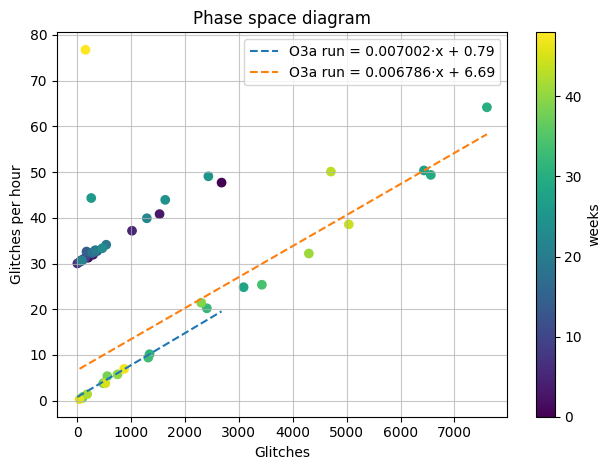

In [17]:
main_plt = plt.gca()

# linear regression for O3a
a, b = np.polyfit(counts_psd_a, rate_psd_a, deg=1)
x_reg = np.linspace(min(counts_psd_a), max(counts_psd_a), 10)
y_reg = a * x_reg + b
plt.plot(x_reg, y_reg, '--', label=f'O3a run = {a:.6f}·x + {b:.2f}')

# linear regression for O3b
c, d = np.polyfit(counts_psd_b, rate_psd_b, deg=1)
x_reg = np.linspace(min(counts_psd_b), max(counts_psd_b), 10)
y_reg = c * x_reg + d
plt.plot(x_reg, y_reg, '--', label=f'O3a run = {c:.6f}·x + {d:.2f}')

# Total weeks index
weeks_total = np.arange(len(counts_psd_a) + len(counts_psd_b))

# Fixed limits for the color scale
vmin = weeks_total.min()
vmax = weeks_total.max()

# scatter = main_plt.scatter(counts, rate, marker='o',
#                             c=weeks_total, cmap='viridis',)
# Scatter O3a
scattera = main_plt.scatter(counts_psd_a, rate_psd_a+30, marker='o',
                            c=weeks_total[:len(counts_psd_a)], cmap='viridis',
                            vmin=vmin, vmax=vmax)

# Scatter O3b
scatterb = main_plt.scatter(counts_psd_b, rate_psd_b, marker='o',
                            c=weeks_total[len(counts_psd_a):], cmap='viridis',
                            vmin=vmin, vmax=vmax)

# Unique colorbar
cbar = plt.colorbar(scattera)
cbar.set_label('weeks')

plt.title('Phase space diagram')
plt.xlabel('Glitches')
plt.ylabel('Glitches per hour')

plt.grid(linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

The inverse of inclination tell us information about operation time of the interferometer, on average. See,

In [18]:
timea, timeb = 1/a, 1/c
print(f'Time average O3a: {timea:.2f}h/week, \nand for O3b:      {timeb:.2f}h/week')

Time average O3a: 142.82h/week, 
and for O3b:      147.36h/week


### 4.3.2 All O3run and consider all glitches

If we consider all glitches in our data we have

In [19]:
O3_all = O3_all[O3_all['label'] != 'No_Glitch']
O3_all = O3_all[O3_all['label'] != 'None_of_the_Above']

In [20]:
import pandas as pd

O3_all["time"] = pd.to_datetime(O3_all["GPStime"], unit="s")
O3_all = O3_all.set_index("time")
weekly_counts = O3_all.resample("w").size().values[1:]

# remove the outlier
weekly_counts = np.delete(weekly_counts, 30)
weekly_counts

/tmp/ipython-input-1628891055.py:5: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  weekly_counts = O3_all.resample("w").size().values[1:]


array([ 4801,   698,  2155,  3432,  1366,  2597,    52,  1471,   480,
         671,   710,   336,   704,  1566,   994,   543,  2177,  1871,
        1329,   977,   939,   494,  2503,  1220,  4119,  3022,     0,
           0,     0,     0, 11428, 12582,  5598,  9903,  4186,  6547,
        7365,   629,   702,  2748,  4386,  3811,  3717,  6774,  4771,
        3461, 12934,  3803,  1081,  3443,  1227])

In [21]:
active_hour = active_O3all*(7*24)

active_hour2 = np.where(active_hour == 0, np.nan, active_hour)

# remove the respective position of outlier
active_hour2 = np.delete(active_hour2, 30)
active_hour2

array([151.2725    , 159.30083333, 144.40472222, 141.26583333,
       151.98611111, 141.70138889, 129.48666667, 119.69361111,
       135.105     , 126.15583333, 116.77666667, 126.45388889,
       125.32111111, 108.61916667,  65.84583333, 125.23166667,
       127.22833333, 114.63888889, 118.175     , 130.59777778,
       121.04722222, 131.36222222, 130.45055556, 139.16111111,
       117.20666667, 127.51888889,  18.13944444,          nan,
                nan,          nan, 136.52444444, 119.72861111,
       127.97277778, 120.86888889, 128.26777778, 127.22888889,
       129.89777778, 148.84277778, 157.39194444, 126.52972222,
       102.26444444, 108.01138889, 127.06277778, 129.28027778,
       129.47638889, 104.59      , 118.74694444, 128.26138889,
       142.72388889, 129.67638889,  62.78277778])

In [22]:
weekly_rate = weekly_counts/active_hour2
weekly_rate

array([ 31.73742749,   4.38164688,  14.92333469,  24.29462184,
         8.98766335,  18.32727273,   0.40158575,  12.28971193,
         3.55279227,   5.31881866,   6.07998173,   2.65709503,
         5.61756909,  14.41734501,  15.09586787,   4.33596401,
        17.11096847,  16.32081415,  11.24603343,   7.48098487,
         7.75730316,   3.76059412,  19.18734642,   8.76681704,
        35.14305216,  23.6984499 ,   0.        ,          nan,
                nan,          nan,  83.70662152, 105.08766354,
        43.74367813,  81.93175342,  32.63485244,  51.45843886,
        56.69842953,   4.22593564,   4.46020286,  21.71821728,
        42.8888068 ,  35.28331632,  29.25325626,  52.39778345,
        36.84841724,  33.0911177 , 108.92069737,  29.65038842,
         7.57406492,  26.55070849,  19.54357618])

In [23]:
weekly_counts = weekly_counts.tolist()
weekly_rate = weekly_rate.tolist()

In [24]:
# Combine the data and filter values NaN
clean_data = np.array([weekly_counts, weekly_rate]).T
clean_data = clean_data[~np.isnan(clean_data).any(axis=1)]

# Separate and clean data
weekly_counts = clean_data[:, 0]
weekly_rate = clean_data[:, 1]

In [25]:
weekly_rate

array([ 31.73742749,   4.38164688,  14.92333469,  24.29462184,
         8.98766335,  18.32727273,   0.40158575,  12.28971193,
         3.55279227,   5.31881866,   6.07998173,   2.65709503,
         5.61756909,  14.41734501,  15.09586787,   4.33596401,
        17.11096847,  16.32081415,  11.24603343,   7.48098487,
         7.75730316,   3.76059412,  19.18734642,   8.76681704,
        35.14305216,  23.6984499 ,   0.        ,  83.70662152,
       105.08766354,  43.74367813,  81.93175342,  32.63485244,
        51.45843886,  56.69842953,   4.22593564,   4.46020286,
        21.71821728,  42.8888068 ,  35.28331632,  29.25325626,
        52.39778345,  36.84841724,  33.0911177 , 108.92069737,
        29.65038842,   7.57406492,  26.55070849,  19.54357618])

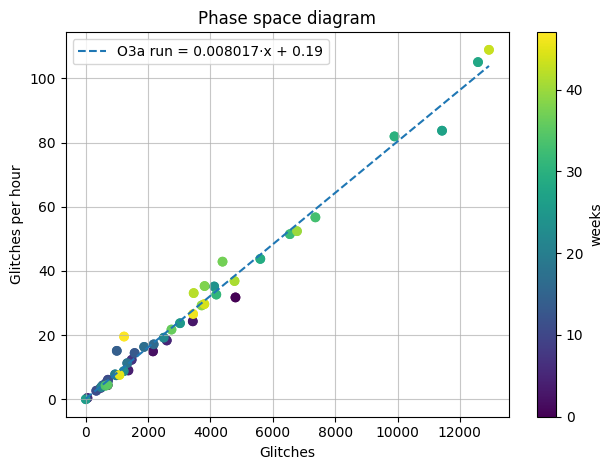

In [26]:
main_plt = plt.gca()

# linear regression for O3all
a2, b2 = np.polyfit(weekly_counts, weekly_rate, deg=1)
x_reg = np.linspace(min(weekly_counts), max(weekly_counts), 100)
y_reg = a2 * x_reg + b2
plt.plot(x_reg, y_reg, '--', label=f'O3a run = {a2:.6f}·x + {b2:.2f}')

# Total weeks index
weeks_total = np.arange(len(weekly_counts))

scatter = main_plt.scatter(weekly_counts, weekly_rate, marker='o',
                            c=weeks_total, cmap='viridis',)
# Scatter O3a
scatter = main_plt.scatter(weekly_counts, weekly_rate, marker='o',
                            c=weeks_total, cmap='viridis')

# Unique colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('weeks')

plt.title('Phase space diagram')
plt.xlabel('Glitches')
plt.ylabel('Glitches per hour')

plt.grid(linestyle='-', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

In [27]:
time = 1/a2
print(f'Time average O3a: {time:.2f}h/week')

Time average O3a: 124.73h/week


## Animation

In [28]:
perfect_operation = 7*24
wp_rate = weekly_counts[28]/perfect_operation
wp_rate

np.float64(74.89285714285714)

In [29]:
pip install celluloid

In [30]:
from celluloid import Camera # importando a camera
import seaborn as sns
import warnings
from IPython.display import HTML # para mostrar o vídeo no jupyter

In [31]:
half_xlim, half_ylim =  max(weekly_counts), max(weekly_rate)
sf.celluloid(weekly_counts, weekly_rate, half_xlim*1.05, half_ylim*1.05, title='Phase space diagram motion', xlabel='Count', ylabel='Rate', interval=300, type='curve')

## 4.4 Correlation matrix for similar visual glitches

Visually by the behavior of the graphics (subsection 4.1), we can assume that there is a related behavior between the **Scattered Light, Low Frequency Lines and Low Frequency Busrt**. So we'll construct the correlation matrix between them.

In [32]:
gps_epoch = pd.Timestamp('1980-01-06 00:00:00', tz='UTC')

matrix_values = []
for i in range(glitches_number):

    df = init_data_O3a[init_data_O3a['label'] == glitches_chosen[i]].copy()
    df.index = gps_epoch + pd.to_timedelta(df['GPStime'], unit='s')

    data_matrix = df.resample('w').size()
    matrix_values.append(data_matrix.values)

/tmp/ipython-input-834287481.py:9: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data_matrix = df.resample('w').size()
/tmp/ipython-input-834287481.py:9: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data_matrix = df.resample('w').size()
/tmp/ipython-input-834287481.py:9: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data_matrix = df.resample('w').size()
/tmp/ipython-input-834287481.py:9: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data_matrix = df.resample('w').size()


In [33]:
matrix_values

[array([2649,  222,  247, 1478,  379,  945,   92,   58,  378,   74,  171,
          42,   69,   54,  128,  159,  237,  412,  279,  531,  355,   96,
        1172,  519, 1498, 2152,  745]),
 array([1432,  234,  112, 1427,  310, 1328,   27,   80,  290,  130,  136,
          77,   65,   80,  171,  205,  307,  563,  392,  329,  506,  174,
         359,  384, 1002,  751,  191]),
 array([291,  93,  77, 523, 142, 348,  67,  20, 235, 110, 120,  46, 105,
         41, 203, 269, 342, 411,  77, 131, 104,  46, 303, 133, 396, 494,
         96]),
 array([10, 31, 32, 45, 37, 42,  0, 16, 44, 35, 27, 27, 31, 49, 22, 31, 22,
        27, 26, 26, 25, 27, 31, 19, 31, 26,  6])]

this result shows how many glitches occurred at each time **time_key**, for all glitches in **glitches_chosen**. So our correlation matrix will be

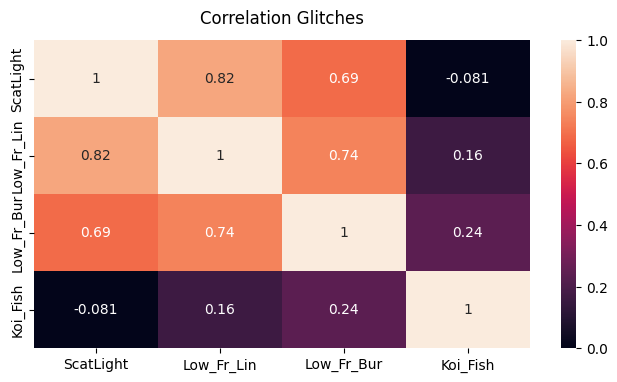

In [34]:
plt.figure(figsize=(8, 4))

x = matrix_values[0]
y = matrix_values[1]
z = matrix_values[2]
w = matrix_values[3]

df = pd.DataFrame([x, y, z, w]).T
df.columns = ['ScatLight', 'Low_Fr_Lin', 'Low_Fr_Bur', 'Koi_Fish']

heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation Glitches', fontdict={'fontsize':12}, pad=12)
plt.show()

The correlation ranges from -1 to 1. The closer to the ends, the greater the correlation between the classes (being maximally directly correlated at 1 and maximally inversely correlated at -1), and the closer to 0, the less correlated the classes are. Note that the main diagonal will have all values ​​equal to 1, since any class is fully correlated with itself.

From this result we see that Scattering Light is about 63% correlated to Low_Frequency Lines (very similar blue and orange curves), while only 1.4% inversely correlated to Koi Fish (reflected by the differences between the blue and red curves)